<a href="https://colab.research.google.com/github/Ashvin-Vargez/Telecom-Churn-Analysis-EDA-Project-/blob/main/eda_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#importing necessary libraries for data manipulation and visualization 
import numpy as np 
import pandas as pd 
import datetime 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# importing drive functionality to read files from google drive  
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading csv file and creating pandas dataframe using pd.read_csv
df_tel = pd.read_csv('/content/drive/MyDrive/Almabetter/EDA Capstone Project _churn analysis/Telecom Churn.csv')

In [4]:
#checking the created dataframe
df_tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#checking the tail of the dataframe 
df_tel.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
#checking the shape of dataframe 
df_tel.shape

(3333, 20)

#Here we can see that the total number of rows is 3333 and that there are 20 columns associated with each row.


In [7]:
#getting an overview of the dataframe 
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
#checking the dataframe for null values 
df_tel.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#From the above operation we found out that there are no null values in our data set, therefore we dont have to do any additional operations to handle missing values.

In [9]:
#checking characteristics of the dataframe 
df_tel_stat = df_tel.describe().transpose()
df_tel_stat

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [10]:
#creating a dataframe with data exculsively of churned customers and loyal customers
df_churn = df_tel[df_tel['Churn'] == True ] 
df_loyal = df_tel[df_tel['Churn']== False]

In [11]:
#checking for insights from churn dataframe 
churn_stat = df_churn.describe().transpose()
churn_stat

,count,mean,std,min,25%,50%,75%,max
Account length,483.0,102.664596,39.467820,1.00,76.000,103.00,127.000,225.00
Area code,483.0,437.817805,42.792270,408.00,408.000,415.00,510.000,510.00
Number vmail messages,483.0,5.115942,11.860138,0.00,0.000,0.00,0.000,48.00
Total day minutes,483.0,206.914079,68.997792,0.00,153.250,217.60,265.950,350.80
Total day calls,483.0,101.335404,21.582307,0.00,87.500,103.00,116.500,165.00
Total day charge,483.0,35.175921,11.729710,0.00,26.055,36.99,45.210,59.64
Total eve minutes,483.0,212.410145,51.728910,70.90,177.100,211.30,249.450,363.70
Total eve calls,483.0,100.561077,19.724711,48.00,87.000,101.00,114.000,168.00
Total eve charge,483.0,18.054969,4.396762,6.03,15.055,17.96,21.205,30.91
Total night minutes,483.0,205.231677,47.132825,47.40,171.250,204.80,239.850,354.90


In [12]:
#checking for insights from loyal dataframe
loyal_stat = df_loyal.describe().transpose()
loyal_stat

,count,mean,std,min,25%,50%,75%,max
Account length,2850.0,100.793684,39.882350,1.00,73.0000,100.00,127.00,243.00
Area code,2850.0,437.074737,42.306156,408.00,408.0000,415.00,510.00,510.00
Number vmail messages,2850.0,8.604561,13.913125,0.00,0.0000,0.00,22.00,51.00
Total day minutes,2850.0,175.175754,50.181655,0.00,142.8250,177.20,210.30,315.60
Total day calls,2850.0,100.283158,19.801157,0.00,87.0000,100.00,114.00,163.00
Total day charge,2850.0,29.780421,8.530835,0.00,24.2825,30.12,35.75,53.65
Total eve minutes,2850.0,199.043298,50.292175,0.00,164.5000,199.60,233.20,361.80
Total eve calls,2850.0,100.038596,19.958414,0.00,87.0000,100.00,114.00,170.00
Total eve charge,2850.0,16.918909,4.274863,0.00,13.9800,16.97,19.82,30.75
Total night minutes,2850.0,200.133193,51.105032,23.20,165.9000,200.25,234.90,395.00


In [13]:
df_churn_percent = (churn_stat/df_tel_stat)*100
df_churn_percent

,count,mean,std,min,25%,50%,75%,max
Account length,14.491449,101.582935,99.110330,100.000000,102.702703,101.980198,100.000000,92.592593
Area code,14.491449,100.145337,100.993548,100.000000,100.000000,100.000000,100.000000,100.000000
Number vmail messages,14.491449,63.167499,86.643934,NaN,NaN,NaN,0.000000,94.117647
Total day minutes,14.491449,115.096074,126.677251,NaN,106.645790,121.293200,122.897412,100.000000
Total day calls,14.491449,100.895857,107.540070,NaN,100.574713,101.980198,102.192982,100.000000
Total day charge,14.491449,115.095765,126.678468,NaN,106.651658,121.278689,122.886654,100.000000
Total eve minutes,14.491449,105.687022,102.001554,inf,106.302521,104.915591,106.013600,100.000000
Total eve calls,14.491449,100.446255,99.006583,inf,100.000000,101.000000,100.000000,98.823529
Total eve charge,14.491449,105.686342,101.997246,inf,106.320621,104.906542,106.025000,100.000000
Total night minutes,14.491449,102.170357,93.196044,204.310345,102.544910,101.789264,101.933702,89.848101


Note that the average number of customer service calls placed by the churned users are 142.67 % of the average customer service calls and the median number of calls are 200% of the number of customer service calls placed by the total users. 

#From the above table, we can see that 14.49 % of the total users have churned and that the users placing a significantly higher number of custmer service calls than the median are at risk of churn.



#This also indicates that the services were not satisfactory for the churned customers.

# Even though the average and median number of international calls made by the churned customers were less than the genral population, the average and median number of minutes of international calls were higher. But the charges incurred by the churned population is not significantly higher than the overall user base.

This indicates that the churned customers made international calls of longer duration than the general population, which may indicate that the users have family or relatives overseas and that the calls may be personal calls and not business calls. 

#Thus the reason for their churn may be motivated by quality or connectivity issues on international calls rather than incurring a higher cost for the same.  

In [14]:
# comparing statistics form the churned dataset to that of the loyal dataset 
churn_loyal_percent = (churn_stat/loyal_stat)*100
churn_loyal_percent

,count,mean,std,min,25%,50%,75%,max
Account length,16.947368,101.856180,98.960619,100.000000,104.109589,103.000000,100.000000,92.592593
Area code,16.947368,100.170009,101.149038,100.000000,100.000000,100.000000,100.000000,100.000000
Number vmail messages,16.947368,59.456163,85.244241,NaN,NaN,NaN,0.000000,94.117647
Total day minutes,16.947368,118.117989,137.496046,NaN,107.299142,122.799097,126.462197,111.153359
Total day calls,16.947368,101.049275,108.995183,NaN,100.574713,103.000000,102.192982,101.226994
Total day charge,16.947368,118.117609,137.497786,NaN,107.299496,122.808765,126.461538,111.164958
Total eve minutes,16.947368,106.715547,102.856776,inf,107.659574,105.861723,106.968268,100.525152
Total eve calls,16.947368,100.522279,98.829050,inf,100.000000,101.000000,100.000000,98.823529
Total eve charge,16.947368,106.714737,102.851543,inf,107.689557,105.833824,106.987891,100.520325
Total night minutes,16.947368,102.547545,92.227365,204.310345,103.224834,102.272160,102.107280,89.848101


#Analysis based on States 

In [34]:
#creating a dataframe with states and their respective churn percentages 
churn_state = pd.DataFrame(df_churn['State'].value_counts())
total_state = pd.DataFrame(df_tel['State'].value_counts())
state_percent = pd.merge(churn_state, total_state, how = 'inner', left_index=True, right_index=True )
state_percent['churn_percentage'] = (state_percent['State_x']/state_percent['State_y'])*100
state_percent.rename( columns = {'State_x':'Churn_no', 'State_y':'total_no'}, inplace = True)
state_percent = state_percent.sort_values('total_no', ascending = True)

print(state_percent.head())
print(state_percent.tail())

    Churn_no  total_no  churn_percentage
CA         9        34         26.470588
IA         3        44          6.818182
PA         8        45         17.777778
LA         4        51          7.843137
AK         3        52          5.769231
    Churn_no  total_no  churn_percentage
OH        10        78         12.820513
AL         8        80         10.000000
NY        15        83         18.072289
MN        15        84         17.857143
WV        10       106          9.433962


From the above table, we can see that the states with five highest churn rates are NJ, CA, TX, MD, SC.
The states with five lowest churn rates are HI, AK, AZ, VA and IA.

In [32]:
# creating a plot for churn percentage 
plt.rcParams['figure.figsize'] = (20, 5) # setting parameters 

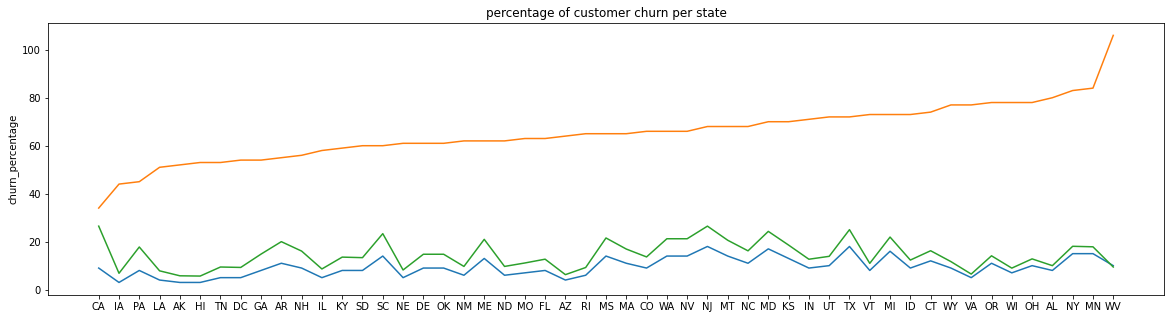

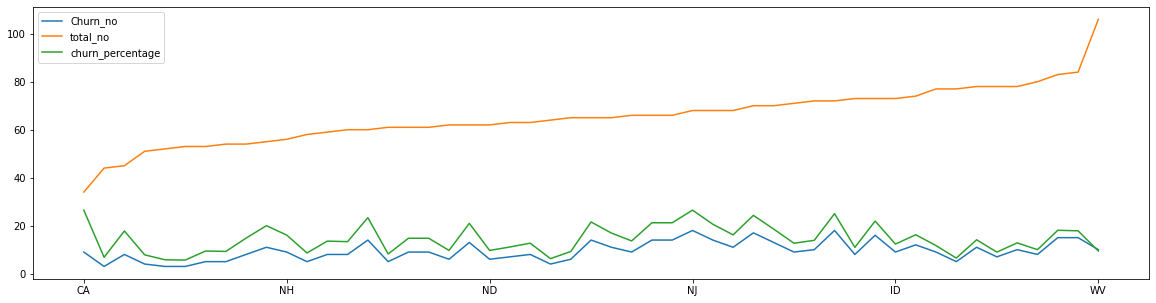

In [36]:
plt.plot(state_percent)
plt.title('percentage of customer churn per state')
plt.ylabel('churn_percentage')
state_percent.plot(use_index=True)

In [16]:
# checking quick statistics 
state_percent.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn_no,51.0,9.470588,4.001764,3.000000,6.500000,9.000000,12.500000,18.000000
total_no,51.0,65.352941,11.801396,34.000000,59.500000,65.000000,72.500000,106.000000
churn_percentage,51.0,14.492688,5.757934,5.660377,9.555691,13.636364,18.321859,26.470588


In [17]:
#create dfs for high churn states and low churn states 

In [18]:
# checking number of service calls made by the churned customers 
median_calls = pd.merge(df_churn.groupby('State')['Customer service calls'].median(), df_loyal.groupby('State')['Customer service calls'].median(), how = 'inner', left_index = True, right_index = True)
median_calls.head()
# try to get a frequency plot with number of service calls made 
# try to compare with service calls made by customers of smae state who didnt churn 


,Customer service calls_x,Customer service calls_y
State,,
AK,4.0,1.0
AL,2.5,1.0
AR,4.0,1.5
AZ,2.0,1.0
CA,0.0,1.0


In [19]:
median_calls.rename(columns = { 'Customer service calls_x':'calls by churned cust', 'Customer service calls_y':'calls by loyal cust'}, inplace = True)
median_calls.head()

,calls by churned cust,calls by loyal cust
State,,
AK,4.0,1.0
AL,2.5,1.0
AR,4.0,1.5
AZ,2.0,1.0
CA,0.0,1.0


In [20]:
median_calls['difference'] = median_calls['calls by churned cust']- median_calls['calls by loyal cust']
median_calls[median_calls['difference']<=.5]

,calls by churned cust,calls by loyal cust,difference
State,,,
CA,0.0,1.0,-1.0
CT,1.0,1.0,0.0
DC,1.0,1.0,0.0
DE,1.0,2.0,-1.0
GA,2.0,2.0,0.0
IL,1.0,1.0,0.0
KS,1.0,1.0,0.0
MA,1.0,1.0,0.0
ME,2.0,2.0,0.0


In [21]:
mean_calls = pd.merge(df_churn.groupby('State')['Customer service calls'].mean(), df_loyal.groupby('State')['Customer service calls'].mean(), how = 'inner', left_index = True, right_index = True)
mean_calls.head()

,Customer service calls_x,Customer service calls_y
State,,
AK,3.333333,1.448980
AL,3.000000,1.402778
AR,3.818182,1.522727
AZ,2.250000,1.550000
CA,1.777778,1.360000


In [22]:
mean_calls['difference'] = mean_calls['Customer service calls_x']- mean_calls['Customer service calls_y']
mean_calls[mean_calls['difference']<=1]

,Customer service calls_x,Customer service calls_y,difference
State,,,
AZ,2.250000,1.550000,0.700000
CA,1.777778,1.360000,0.417778
CO,2.555556,1.666667,0.888889
CT,1.416667,1.532258,-0.115591
DC,1.800000,1.306122,0.493878
DE,1.444444,1.653846,-0.209402
FL,2.125000,1.490909,0.634091
GA,2.250000,1.869565,0.380435
IL,1.200000,1.132075,0.067925


In [23]:
# checking customers who have churned without making a customer service call 
df_no_call_churn = df_churn[df_churn['Customer service calls']== 0 ]
df_state_no_call_no = df_no_call_churn['State'].value_counts()
no_call_churn_percent = pd.merge(df_state_no_call_no, churn_state, how = 'inner', left_index = True, right_index = True )
#churn_state is the dataframe containing states and the  respective number of churned customers 
no_call_churn_percent.head()
# try to group no call churners by state and see if there are any relations, eg better plans available

,State_x,State_y
TX,5,18
CA,5,9
OH,5,10
DE,4,9
MA,4,11


In [24]:
no_call_churn_percent.rename(columns = {'State_x':' no_call_churns', 'State_y':'total_churns'}, inplace = True)
no_call_churn_percent.head()

,no_call_churns,total_churns
TX,5,18
CA,5,9
OH,5,10
DE,4,9
MA,4,11


In [25]:
no_call_churn_percent['percent']= (no_call_churn_percent[['no_call_churns']]/no_call_churn_percent[['total_churns']])*100)
no_call_churn_percent

SyntaxError: ignored

In [ ]:
#binning into categories to classify and make comparisons 
# see which state, plan type, total day minutes, total day calls , charges etc 